In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
a_s = []
b_s = []
cost_s = []

def gradient_descent(a:int,b:int,lr:float,X:np.array,Y:np.array,n,max_steps:int,cost_func,grad_decr):
    """
    a,b : coeffs. inputs a,b are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    n : number of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-6
    cost = None
    a_s.append(a)
    b_s.append(b)

    for step in range(max_steps):
        a_prev,b_prev = a,b
        
        Y_pred = a*X - b
        decr_a,decr_b = grad_decr(n,Y,Y_pred,X)

        a = a_prev - lr*decr_a
        b = b_prev - lr*decr_b

        cost = cost_func(X,Y,n,a,b)
        costs.append(cost)

        a_s.append(a)
        b_s.append(b)
        cost_s.append(cost)
        # print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return a,b

In [81]:
def mse(x:np.array,y:np.array,n:int,a:float,b:float):
    return (1/n)*np.sum((y-(a*x+b))**2)

In [82]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return rss/tss

In [83]:
def grad_decr_least_squares(n,Y,Y_pred,X):
    return \
        (-2/n)*np.sum((Y-Y_pred)*X), \
        (2/n)*np.sum(Y-Y_pred)

In [84]:
def grad_decr_r_squared(n,Y,Y_pred,X):
    y_mean = np.sum(Y)/n
    tss = np.sum((Y-y_mean)**2)

    return \
        (-2/tss)*np.sum((Y-Y_pred)*X), \
        (2/tss)*np.sum(Y-Y_pred)

In [85]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,6,8,10])

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split

score_df = pd.read_csv("data/score.csv")
score_df

x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],train_size=0.9,random_state=42)

In [87]:
X = x_train
Y = y_train

In [88]:
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000

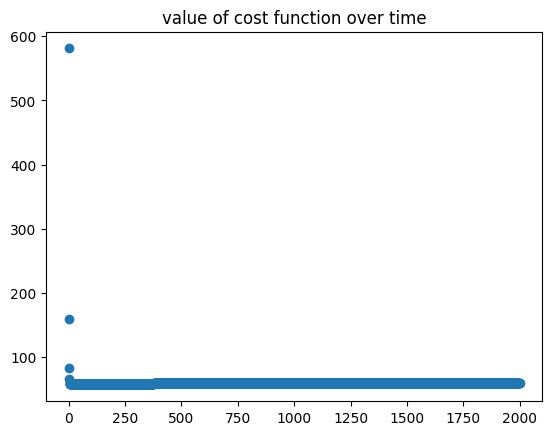

In [89]:
a,b = gradient_descent(a,b,lr,X,Y,n,max_steps,cost_func=mse,grad_decr=grad_decr_least_squares)

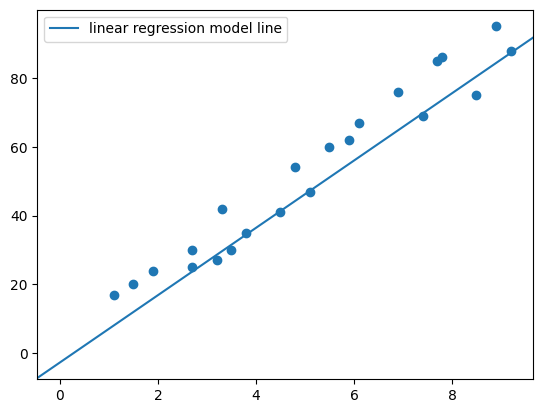

In [90]:
fig,ax  = plt.subplots()
ax.scatter(X,Y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()

In [91]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss

Graphics utility

In [92]:
def plot_data(
    x, y, title, xlabel, ylabel, a_s=None, b_s=None, labels=None, colors=None
):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if a_s and b_s:
        if not labels:
            labels = ["" for a in a_s]
        if not colors:
            colors = ["C0" for a in a_s]
        # fig,ax  = plt.subplots()
        for a, b, color, label in zip(a_s, b_s, colors, labels):
            ax.axline((0, b), slope=a, color=color, label=label)
            ax.legend()

    fig.show()
    plt.show()

Modularization of steps for gradient descent

In [93]:
class StraightLinearRegressorGrad():
    def fit(self,x,y,init_a=-1,init_b=0,lr=0.05,n=None,max_steps=500,cost_func=mse,grad_decr=grad_decr_least_squares):
        if not n:
            n = len(x)
        
        self.a,self.b = gradient_descent(a=init_a,b=init_b,lr=lr,X=x,Y=y,n=n,max_steps=max_steps,cost_func=cost_func,grad_decr=grad_decr)

    def predict(self,x:np.array):
        # n = len(x)
        y = a*x + b
        return y

    def score(self,x,y):
        return r_squared(x,y,len(x),self.a,self.b)

Applications

In [94]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [95]:
score_df = pd.read_csv("data/score.csv")
score_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [96]:
x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],test_size=0.5,random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15572\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


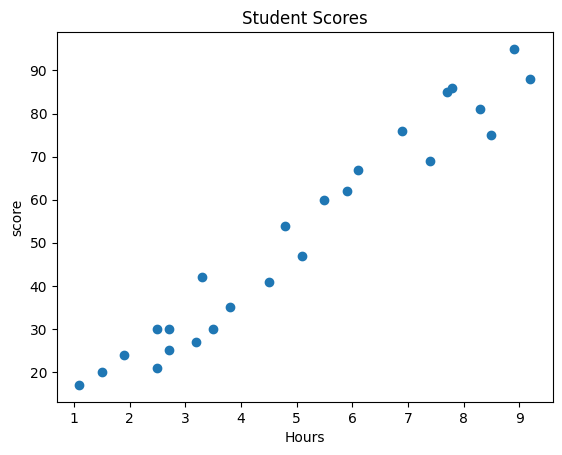

In [97]:
plot_data(score_df["Hours"],score_df["Scores"],title="Student Scores",xlabel="Hours",ylabel="score")

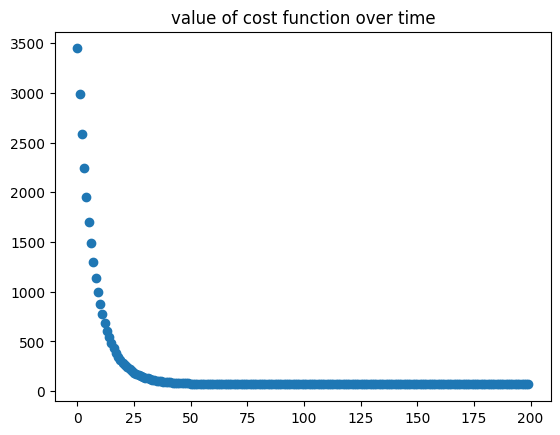

LinearRegression()

In [98]:
custom_reg = StraightLinearRegressorGrad()
custom_reg.fit(init_a=0,init_b=-1,lr=0.001,x=x_train,y=y_train,max_steps=200,cost_func=mse,grad_decr=grad_decr_least_squares)
"""
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000
"""
sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_

In [52]:
print(custom_reg.a,custom_reg.b)

9.745914995446444 -2.7095466786294047


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15572\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


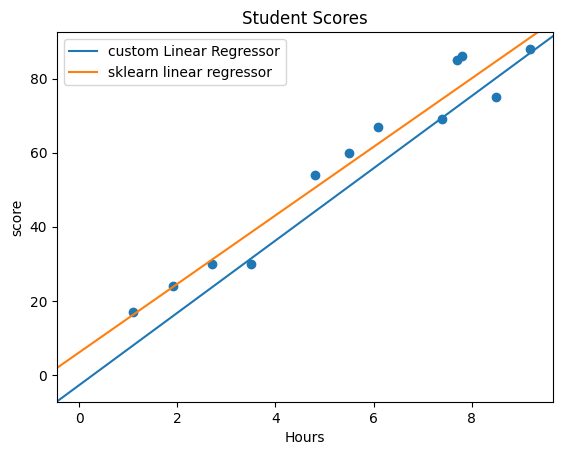

In [53]:
plot_data(x_train,y_train,title="Student Scores",xlabel="Hours",ylabel="score",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [54]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.9426307007429557

In [55]:
custom_reg.score(x_test,y_test)

0.916573118955085

In [56]:
salary_df = pd.read_csv("data/Salary_Data.csv")
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [57]:
x_train,x_test,y_train,y_test = train_test_split(salary_df["YearsExperience"],salary_df["Salary"],test_size=0.5,random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15572\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


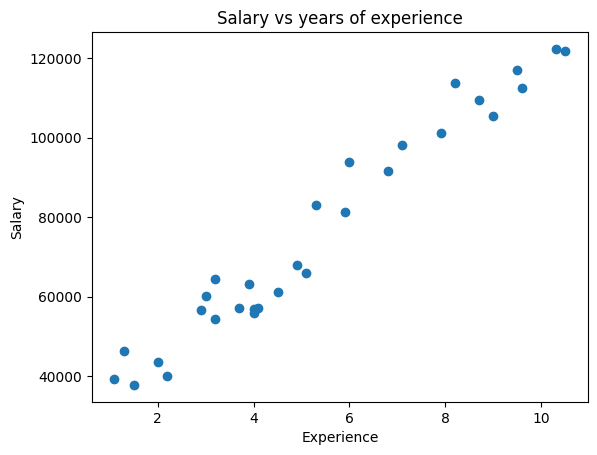

In [58]:
plot_data(salary_df["YearsExperience"],salary_df["Salary"],title="Salary vs years of experience",xlabel="Experience",ylabel="Salary")

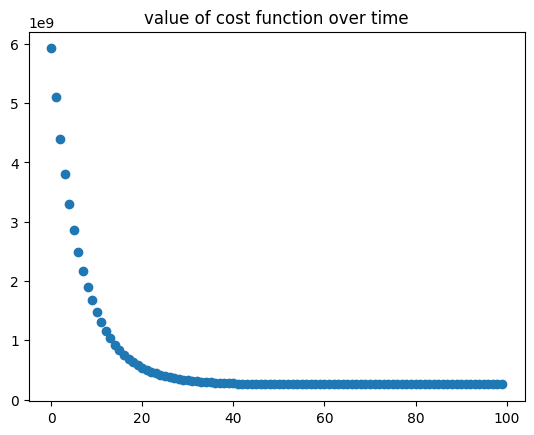

LinearRegression()

In [59]:
custom_reg = StraightLinearRegressorGrad()
custom_reg.fit(init_a=0,init_b=-1,lr=0.001,x=x_train,y=y_train,max_steps=100,cost_func=mse,grad_decr=grad_decr_least_squares)

sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15572\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


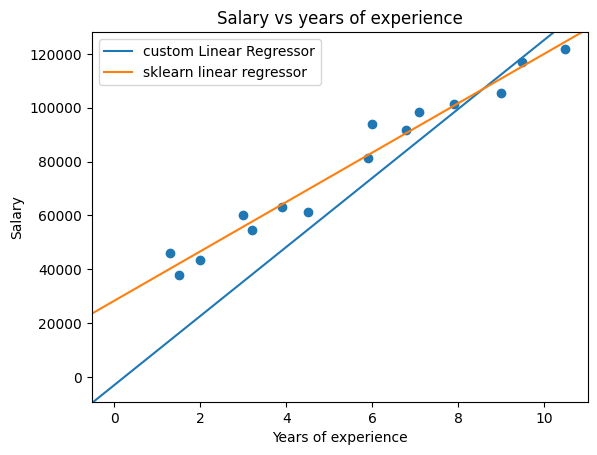

In [60]:
plot_data(x_train,y_train,title="Salary vs years of experience",xlabel="Years of experience",ylabel="Salary",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [61]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.940087016255447

In [62]:
custom_reg.score(x_test,y_test)

0.7024879851691122

## Functions to animate the plot over time, and the cost function value over time

In [99]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib.pyplot as plt

num_iters = 30

def create_video(X, Y, a, b, iterations):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X, Y)
    line, = ax.plot([], [], color='red')

    def update(frame):
        if frame > 0:
            line.set_data([], [])  # Clear the previous line
        Y_pred = a[frame] * X + b[frame]
        line.set_data(X, Y_pred)
        ax.set_title(f"Iteration: {frame+1}")
        return scatter, line

    animation = FuncAnimation(fig, update, frames=iterations, interval=500, blit=True)
    plt.close()

    return HTML(animation.to_html5_video())

create_video(X, Y, a_s[:num_iters], b_s[:num_iters], num_iters) # len(a_s))

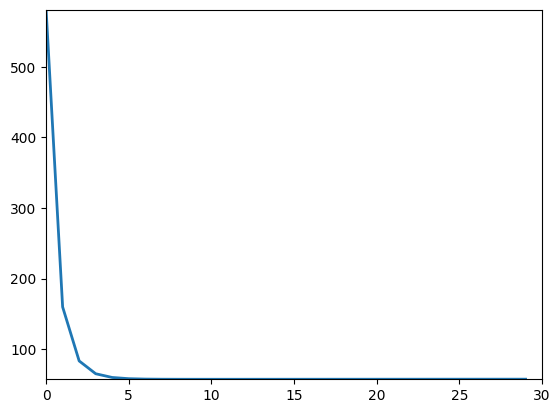

In [101]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a figure and axis
fig, ax = plt.subplots()

# Set up the axis limits
ax.set_xlim(0, num_iters)
ax.set_ylim(min(cost_s[:num_iters]), max(cost_s[:num_iters]))

# Create a line plot for the cost function
line, = ax.plot([], [], lw=2)

# Update function for the animation
def update(frame):
    line.set_data(range(frame+1), cost_s[:frame+1])
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iters, interval=200, blit=True)

# Save the animation as a video file
ani.save('cost_function_animation.mp4', writer='ffmpeg')

# Show the animation
HTML(ani.to_html5_video())
